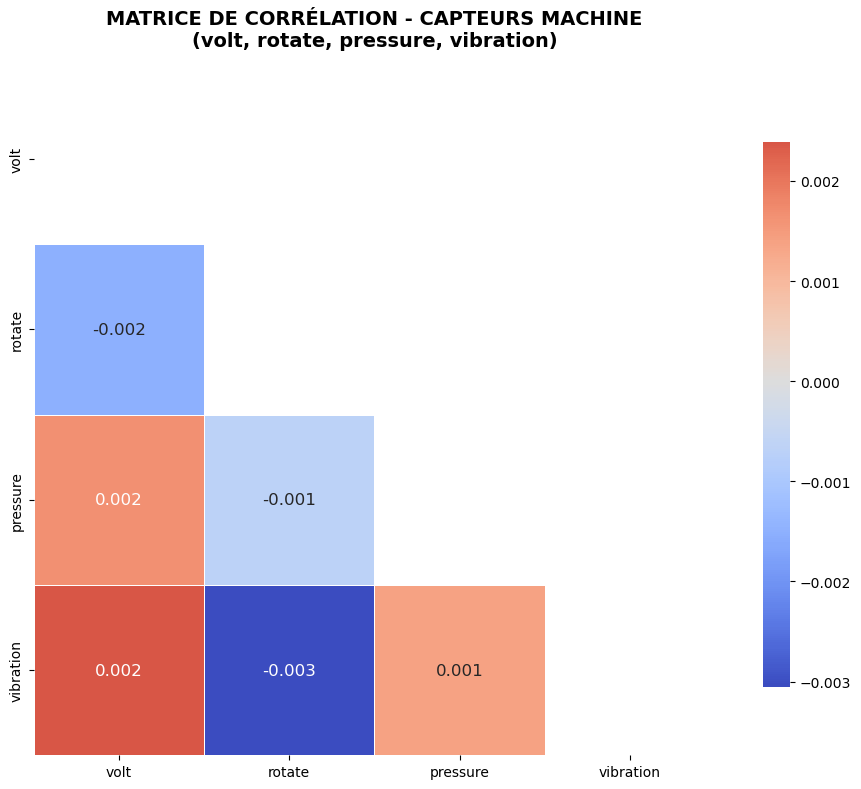

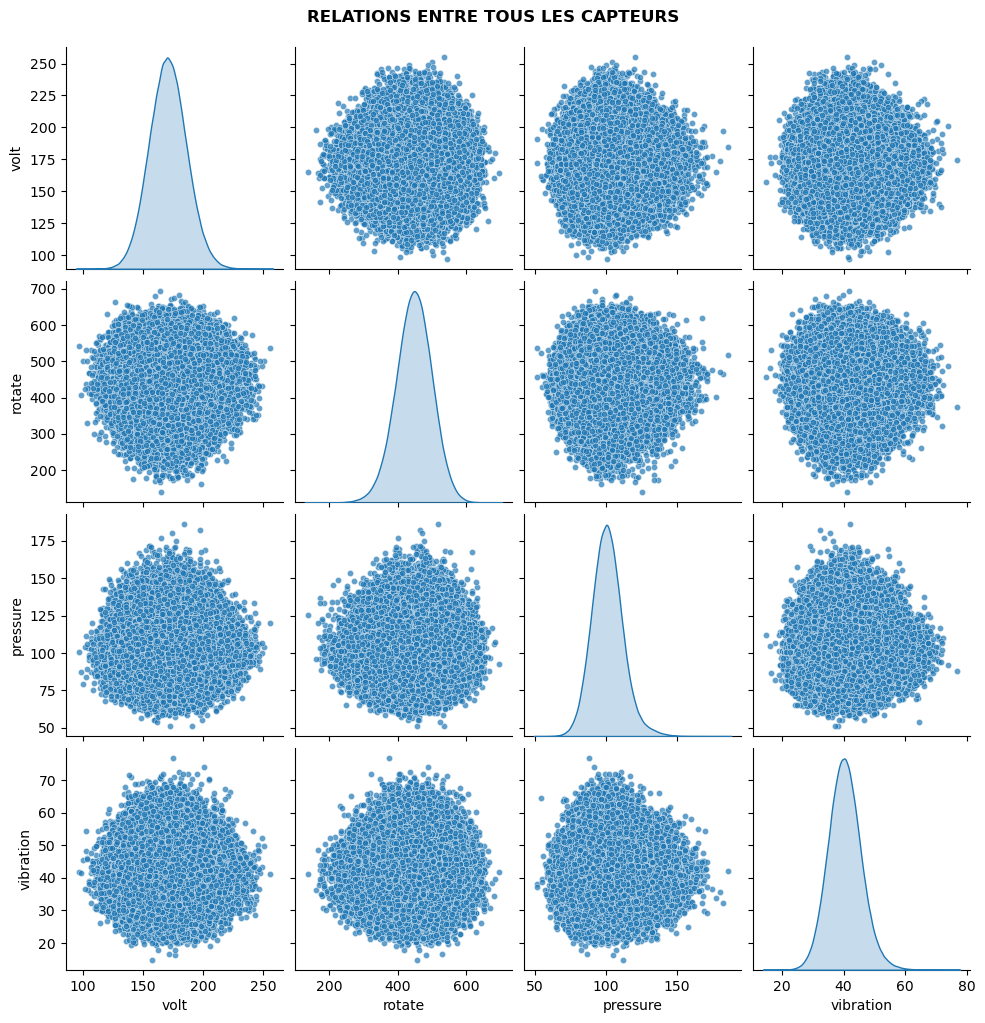

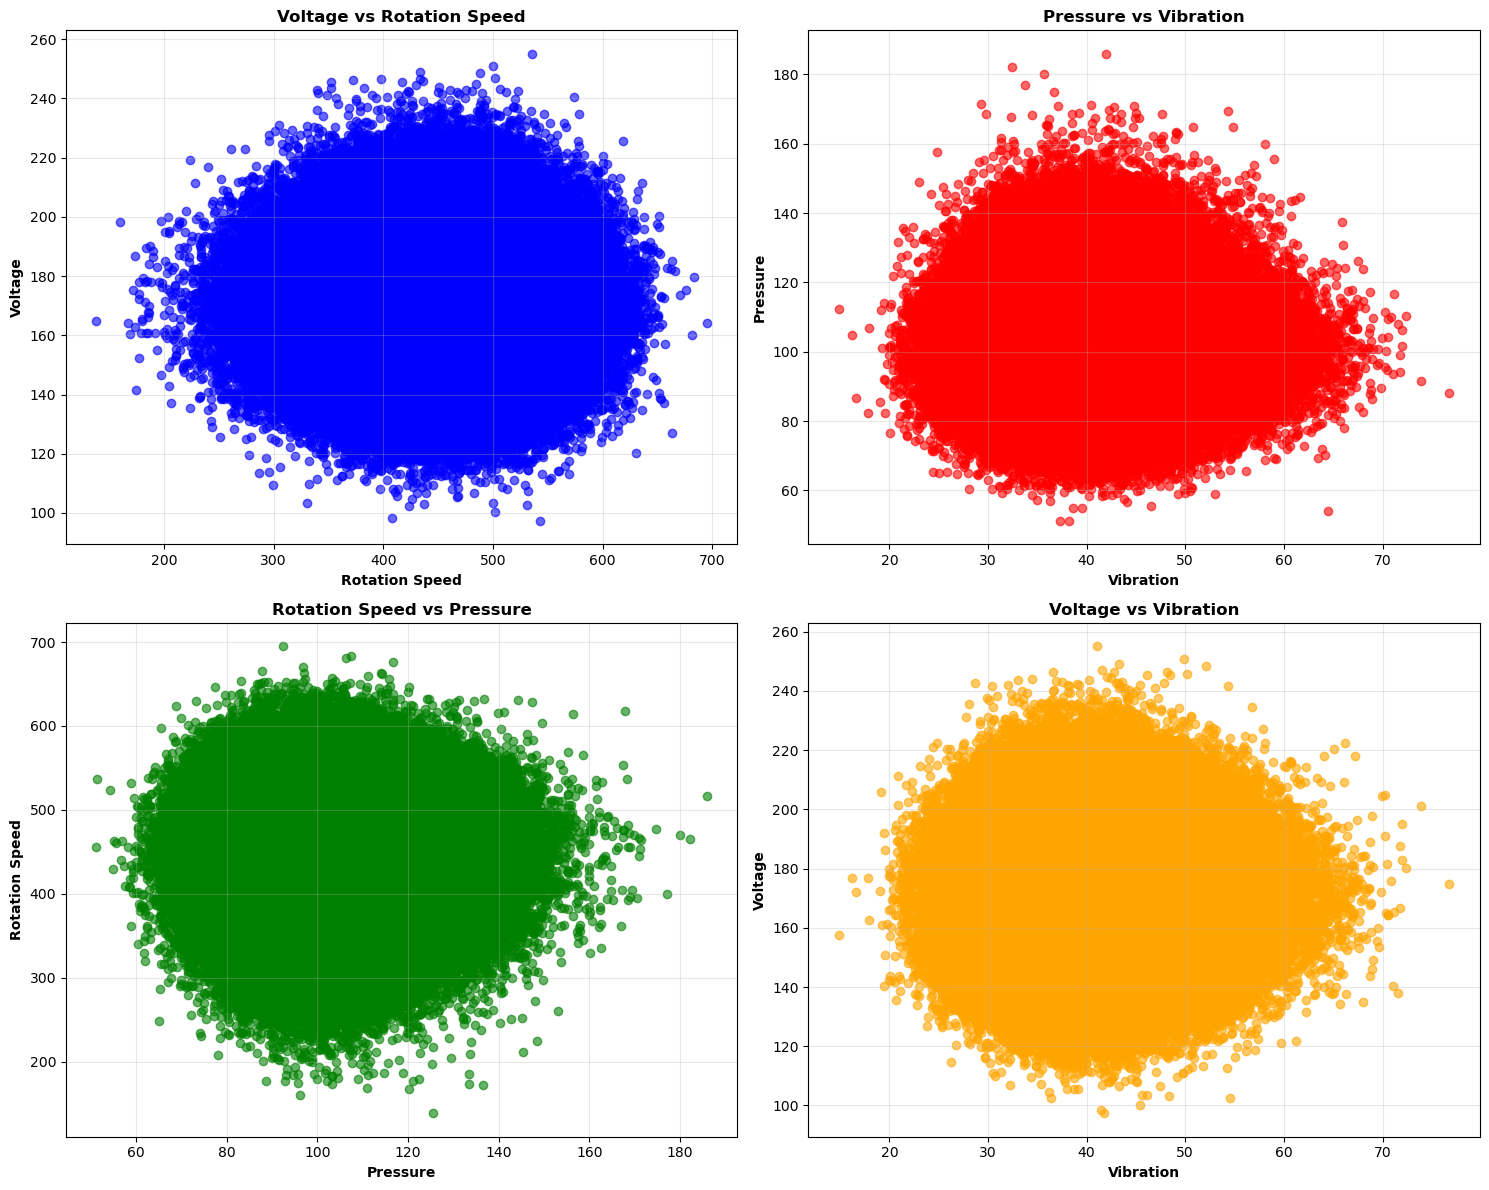

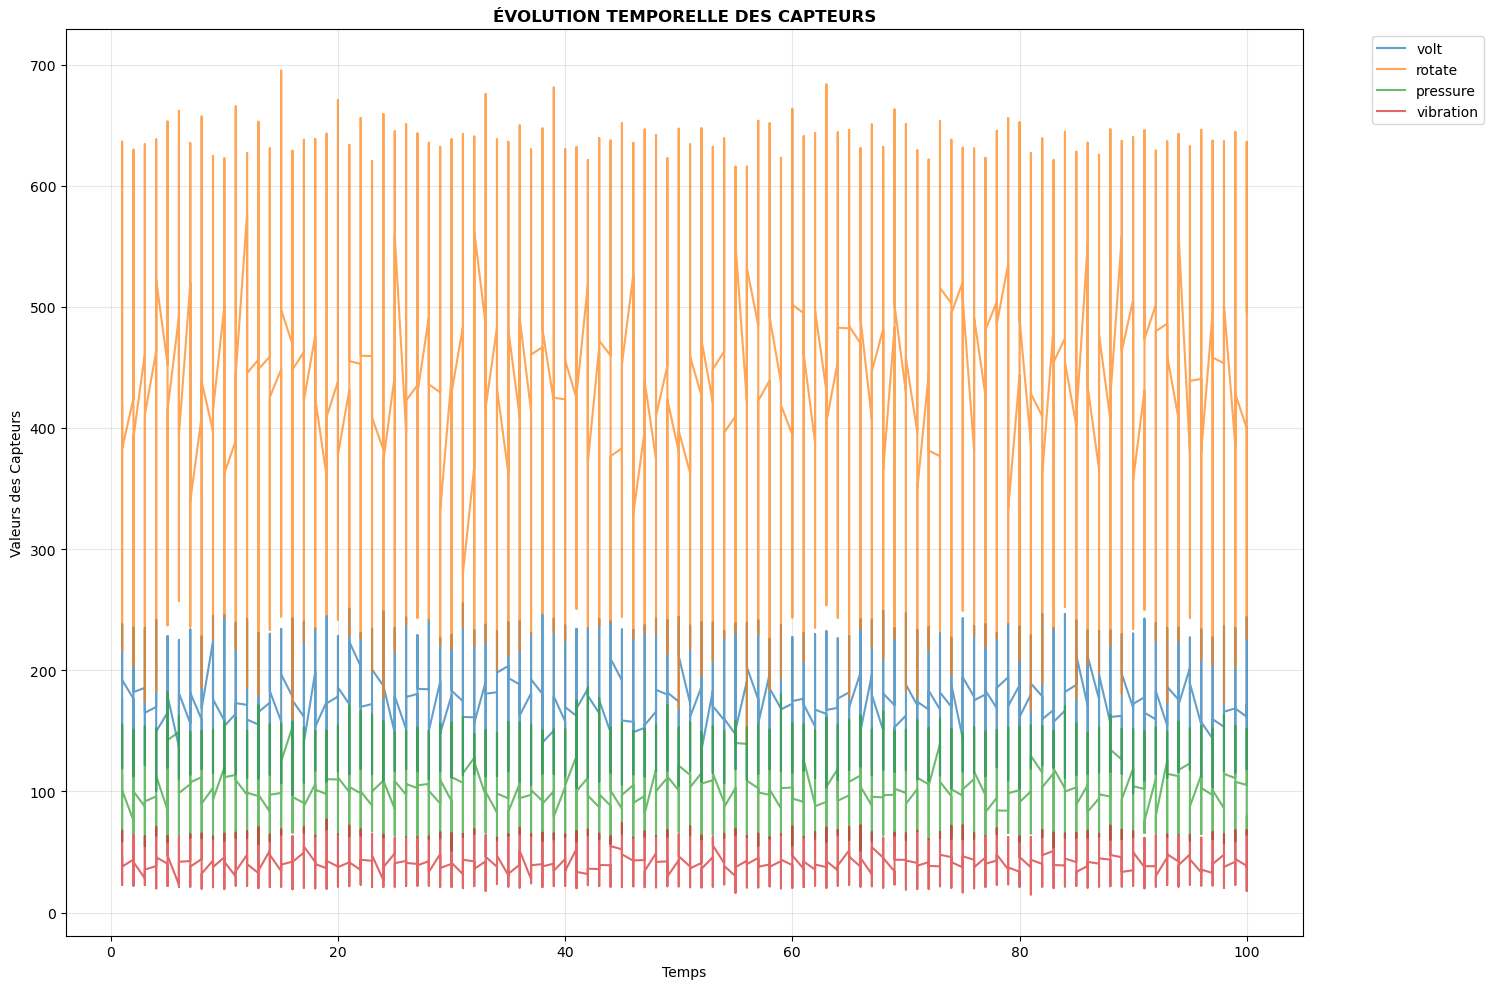

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement du dataset
try:
    # Si c'est un fichier CSV
    PDM_machine = pd.read_csv('PdM_telemetry.csv')  # Colonne 1 = datetime
    
    # OU si c'est un fichier Excel
    # PDM_machine = pd.read_excel('votre_fichier.xlsx', parse_dates=[1])
    
    # OU si c'est déjà dans un DataFrame
    # PDM_machine = df  # Remplacez df par le nom de votre variable
    
except FileNotFoundError:
    print("❌ Fichier non trouvé. Vérifiez le chemin.")
except Exception as e:
    print(f"❌ Erreur lors du chargement: {e}")

# Sélection des colonnes de capteurs
sensor_cols = ['volt', 'rotate', 'pressure', 'vibration']
corr_matrix = PDM_machine[sensor_cols].corr()

# Heatmap stylisée
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', linewidths=0.5, cbar_kws={"shrink": .8},
            annot_kws={"size": 12})

plt.title('MATRICE DE CORRÉLATION - CAPTEURS MACHINE\n(volt, rotate, pressure, vibration)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Pairplot pour voir toutes les interactions
sns.pairplot(PDM_machine[sensor_cols], 
             diag_kind='kde', 
             plot_kws={'alpha': 0.7, 's': 20},
             corner=False)
plt.suptitle('RELATIONS ENTRE TOUS LES CAPTEURS', y=1.02, fontweight='bold')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Voltage vs Rotation
axes[0,0].scatter(PDM_machine['rotate'], PDM_machine['volt'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Rotation Speed', fontweight='bold')
axes[0,0].set_ylabel('Voltage', fontweight='bold')
axes[0,0].set_title('Voltage vs Rotation Speed', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# 2. Pression vs Vibration
axes[0,1].scatter(PDM_machine['vibration'], PDM_machine['pressure'], alpha=0.6, color='red')
axes[0,1].set_xlabel('Vibration', fontweight='bold')
axes[0,1].set_ylabel('Pressure', fontweight='bold')
axes[0,1].set_title('Pressure vs Vibration', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Rotation vs Pression
axes[1,0].scatter(PDM_machine['pressure'], PDM_machine['rotate'], alpha=0.6, color='green')
axes[1,0].set_xlabel('Pressure', fontweight='bold')
axes[1,0].set_ylabel('Rotation Speed', fontweight='bold')
axes[1,0].set_title('Rotation Speed vs Pressure', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Voltage vs Vibration
axes[1,1].scatter(PDM_machine['vibration'], PDM_machine['volt'], alpha=0.6, color='orange')
axes[1,1].set_xlabel('Vibration', fontweight='bold')
axes[1,1].set_ylabel('Voltage', fontweight='bold')
axes[1,1].set_title('Voltage vs Vibration', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Vérifier si la colonne timestamp existe
if 'datetime' in PDM_machine.columns or PDM_machine.columns[1] == '2015-01-02 02:00:00':
    # Utiliser la première colonne de date comme index temporel
    time_series = PDM_machine.set_index(PDM_machine.columns[1])
    time_series[sensor_cols].plot(figsize=(15, 10), alpha=0.7)
    plt.title('ÉVOLUTION TEMPORELLE DES CAPTEURS', fontweight='bold')
    plt.ylabel('Valeurs des Capteurs')
    plt.xlabel('Temps')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()